# SPLAT Tutorials: Basic Spectral Analysis

## Authors
Adam Burgasser

## Version date
18 January 2022

## Learning Goals
* Read in a spectrum from the SPLAT database or externally (splat.searchLibrary, splat.getSpectrum)
* Plot a spectrum (splat.Spectrum.plot)
* Some basic manipulation of spectra - normalizing, scaling, trimming, changing units, spectral math (splat.Spectrum)
* Flux calibrate a spectrum (splat.Spectrum.fluxCalibrate)
* Compare a spectrum to another spectrum (splat.compareSpectrum)
* Compare a spectrum a set of spectral standards (splat.classifyByStandard)
* Measure a set of indices to infer a classification (splat.measureIndexSet, splat.classifyByIndex)

## Keywords
spectral archive, spectral analysis, indices, classification

## Companion Content
None

## Summary
In this tutorial, we will examine how to draw a spectrum from the SPLAT library and conduct some basic spectral analyses to that object, including visualization, manipulation of the spectrum, using photometry to flux calibrate or measure the colors of a spectrum, measure spectral indices, and classification.


# Starting off

Let's make sure the code is properly downloaded through the import statements; see http://pono.ucsd.edu/~adam/browndwarfs/splat/ for more detail on the proper installation procedures

In [1]:
# main splat import
import splat
import splat.plot as splot
import splat.photometry as sphot
import splat.empirical as spem

# other useful imports
import matplotlib.pyplot as plt
import numpy as np
import pandas
import astropy.units as u
from astropy.io import fits
from astropy.utils.data import download_file




Welcome to the Spex Prism Library Analysis Toolkit (SPLAT)!
If you make use of any features of this toolkit for your research, please remember to cite the SPLAT paper:

Burgasser et al. (2017, Astro. Soc. India Conf. Series 14, p. 7); Bibcode: 2017ASInC..14....7B

If you make use of any spectra or models in this toolkit, please remember to cite the original source.
Please report any errors are feature requests to our github page, https://github.com/aburgasser/splat/




In [2]:
# check what version you are using
splat.VERSION

'2022.01.18'

In [3]:
# check that you have some spectra in the library
splat.DB_SOURCES

,SOURCE_KEY,NAME,DESIGNATION,RA,DEC,DISCOVERY_REFERENCE,OPT_TYPE,OPT_TYPE_REF,NIR_TYPE,NIR_TYPE_REF,...,MU_REF,VTAN,VTAN_E,RV,RV_E,RV_REF,VSINI,VSINI_E,VSINI_REF,NOTE
0,10001,SDSS J000013.54+255418.6,J00001354+2554180,0.056417,25.904999,2004AJ....127.3553K,NaN,NaN,T4.5,2006ApJ...637.1067B,...,2008MNRAS.384.1399J,8.712655,1.960132,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10002,2MASS J0000286-124515,J00002867-1245153,0.119458,-12.754250,2007AJ....133..439C,M8.5,2007AJ....133..439C,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10003,SDSS J000112.18+153535.5,J00011218+1535355,0.300750,15.593194,2004AJ....127.3553K,NaN,NaN,L4 beta,2015ApJS..219...33G,...,2008MNRAS.384.1399J,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10004,2MASS J00013044+1010146,J00013044+1010146,0.376833,10.170723,2004AJ....127.2856B,NaN,NaN,M7,2004AJ....127.2856B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10005,WISE J000131.93-084126.9,J00013193-0841269,0.383042,-8.690556,2014ApJ...787..126L,NaN,NaN,L1 pec (blue),2014ApJ...787..126L,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2710,12830,SDSS J034707.61+041754.0AB,J03470757+0417545,56.781708,4.298350,NaN,NaN,NaN,M8.0,SPL,...,2017AJ....153...92T,13.214647,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2711,12831,SDSS J034707.61+041754.0B,J03470757+0417545,56.781708,4.298350,NaN,NaN,NaN,M8.0,SPL,...,2017AJ....153...92T,13.620247,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2712,12832,LHS 5097,J04284964+0728356,67.206833,7.476406,NaN,NaN,NaN,M6.0,SPL,...,2005AJ....129.1483L,41.343627,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2713,12833,2MASS J04333153-0211010,J043331531-02110105,68.381375,-2.183625,NaN,NaN,NaN,M6.0,SPL,...,2011AJ....142...10B,31.849811,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# who has contributed to this code?
splat.AUTHORS

['Christian Aganze',
 'Daniella Bardalez Gagliuffi',
 'Jessica Birky',
 'Adam Burgasser (PI)',
 'Caleb Choban',
 'Andrew Davis',
 'Ivanna Escala',
 'Joshua Hazlett',
 'Carolina Herrara Hernandez',
 'Aishwarya Iyer',
 'Yuhui Jin',
 'Michael Lopez',
 'Dorsa Majidi',
 'Diego Octavio Talavera Maya',
 'Alex Mendez',
 'Gretel Mercado',
 'Niana Mohammed',
 'Elizabeth Hilario Moreno',
 'Jonathan Parra',
 'Maitrayee Sahi',
 'Adrian Suarez',
 'Melisa Tallis',
 'Chris Theissen',
 'Tomoki Tamiya',
 'Steven Truong',
 'Russell Van Linge']

# Reading in and visualizing spectra

SPLAT contains a built-in library of published SpeX prism spectra of ultracool dwarfs. It is also possible to download additional spectral datasets and read in your own spectrum or a spectrum from an website. Once you've read a spectrum into a Spectrum object, you can use the built-in features to visualize the spectrum.

In [6]:
splat.getSpectrum?


Retrieving 1 lucky file



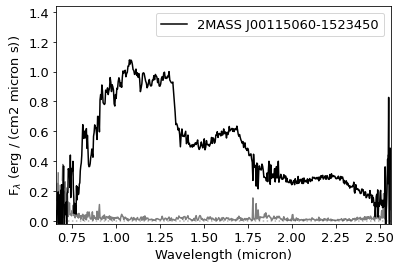

[<Figure size 432x288 with 1 Axes>]

<Figure size 432x288 with 0 Axes>

In [10]:
# grab a random spectrum from the library and plot it
# this produces a list of Spectrum objects so we want just the first one
sp = splat.getSpectrum(lucky=True)[0]
sp.plot()

In [11]:
# get some information about this spectrum using info()
sp.info()


SPEX-PRISM spectrum of 2MASS J00115060-1523450
Airmass = nan
Source designation = J00115060-1523450
Median S/N = 46
SpeX Classification = M7.0
Spectrum key = 10130, Source key = 10025

If you use these data, please cite:
	Burgasser, A. J. et al. (2004, Astronomical Journal, 127, 2856-2870)
	bibcode: 2004AJ....127.2856B

History:
	SPEX-PRISM spectrum successfully loaded



Retrieving 1 lucky file



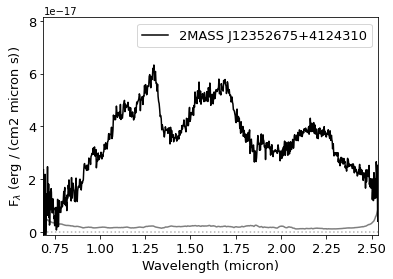

[<Figure size 432x288 with 1 Axes>]

<Figure size 432x288 with 0 Axes>

In [13]:
# grab a random L5 dwarf
# this produces a list of Spectrum objects so we want just the first one
sp = splat.getSpectrum(spt='L5', lucky=True)[0]
sp.plot()

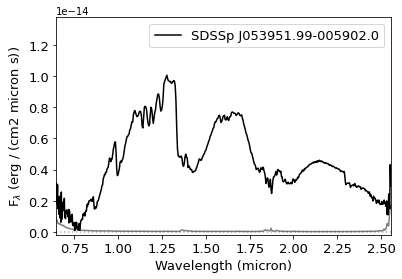

[<Figure size 432x288 with 1 Axes>]

<Figure size 432x288 with 0 Axes>

In [14]:
# grab a very specific spectrum based on its source ID
sp = splat.Spectrum(10001)
sp.plot()


Retrieving 3 files

[SPEX-PRISM spectrum of TWA 30A, SPEX-PRISM spectrum of TWA 30A, SPEX-PRISM spectrum of TWA 30A]


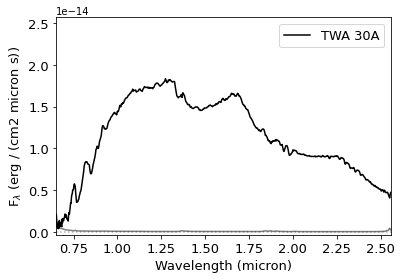

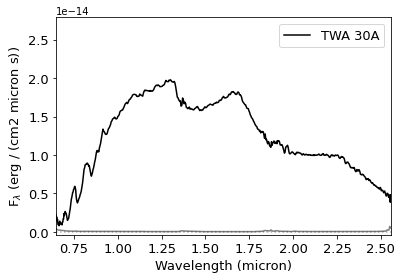

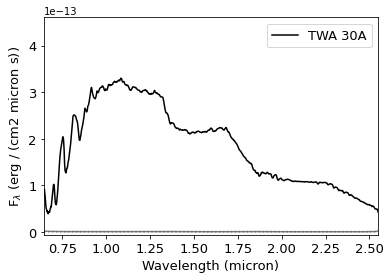

<Figure size 432x288 with 0 Axes>

In [15]:
# grab all the spectra of TWA 30A
splist = splat.getSpectrum(name='TWA 30A')
print(splist)
for sp in splist: sp.plot()


Retrieving 1 file



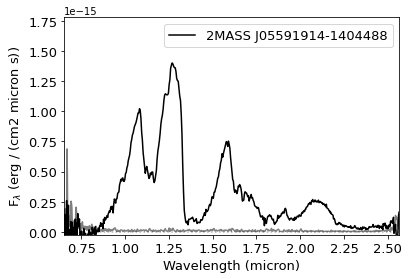

[<Figure size 432x288 with 1 Axes>]

<Figure size 432x288 with 0 Axes>

In [16]:
# grab a spectrum based on a "shortname" (RA and DEC shorthand)
sp = splat.getSpectrum(shortname='J0559-1404')[0]
sp.plot()

In [20]:
# we can also search the library for spectra
# this produces a pandas table of the relevant spectra
s = splat.searchLibrary(nir_spt=['L5','L9'],snr=50)
s

,SOURCE_KEY,NAME,DESIGNATION,RA,DEC,DISCOVERY_REFERENCE,OPT_TYPE,OPT_TYPE_REF,NIR_TYPE,NIR_TYPE_REF,...,REDUCTION_SPEXTOOL_VERSION,REDUCTION_PERSON,REDUCTION_DATE,QUALITY_FLAG,MEDIAN_SNR,SPEX_TYPE,SPEX_GRAVITY_CLASSIFICATION,PUBLISHED,DATA_REFERENCE,NOTE_SP
0,12736,2MASS J00133470+1109403,J00133470+1109403,3.397500,11.161689,2017arXiv170803688K,NaN,NaN,L7.0,SPL,...,v4.0,Kellogg,NaN,OK,68.704697,L7.0,INT-G,Y,2017arXiv170803688K,NaN
1,10031,SDSS J001608.44-004302.3,J00160843-00430209,4.035125,-0.717222,2004AJ....127.3553K,NaN,NaN,L5.5,2004AJ....127.3553K,...,v3.4,NaN,NaN,OK,70.000000,L3.0,INT-G,Y,2014ApJ...794..143B,NaN
2,10054,2MASSW J0030300-145033,J00303013-1450333,7.625542,-14.842583,2000AJ....120..447K,L7,2000AJ....120..447K,L5 beta,2015ApJS..219...33G,...,NaN,NaN,NaN,OK,56.000000,L7.0,VL-G,Y,2010ApJ...710.1142B,NaN
3,10056,WISE J003110.04+574936.3,J00311004+5749363,7.791833,57.826748,2013PASP..125..809T,NaN,NaN,L8,2013PASP..125..809T,...,v3.4,NaN,NaN,OK,58.000000,L9.0,NaN,Y,2013ApJ...777...84B,NaN
4,10056,WISE J003110.04+574936.3,J00311004+5749363,7.791833,57.826748,2013PASP..125..809T,NaN,NaN,L8,2013PASP..125..809T,...,v3.4,NaN,NaN,OK,78.000000,T0.0,NaN,N,BURGASSER-NP,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,11585,2MASS J22120703+3430351,J22120703+3430351,333.029300,34.509750,2008AJ....136.1290R,L5:,2008AJ....136.1290R,L6,2010ApJS..190..100K,...,NaN,NaN,NaN,OK,66.000000,L6.0,FLD-G,Y,2010ApJ...710.1142B,NaN
91,11622,2MASSW J2244316+204343,J22443167+2043433,341.131960,20.728695,2002AJ....124.1170D,L6.5,2008ApJ...689.1295K,L7 beta,2015ApJS..219...33G,...,NaN,NaN,NaN,OK,95.000000,L7.0,VL-G,Y,2008ApJ...686..528L,NaN
92,11630,DENIS-P J225210.73-173013.4,J22521073-1730134,343.044710,-17.503723,2004A&A...416L..17K,NaN,NaN,L7.5,2004A&A...416L..17K,...,NaN,NaN,NaN,OK,125.000000,T0.0,NaN,Y,2006ApJ...639.1114R,NaN
93,11650,2MASS J23174712-4838501,J23174712-4838501,349.446320,-48.647251,2010ApJS..190..100K,L4 pec,2010ApJS..190..100K,L5 gamma,2015ApJS..219...33G,...,v3.3,NaN,NaN,OK,82.000000,L5.0,INT-G,Y,2010ApJS..190..100K,NaN


11880


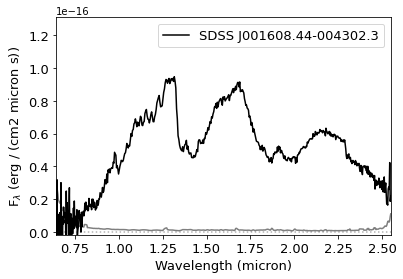

[<Figure size 432x288 with 1 Axes>]

<Figure size 432x288 with 0 Axes>

In [18]:
# choose one of these spectra
print(s['DATA_KEY'][1])
sp = splat.Spectrum(s['DATA_KEY'][1])
sp.plot()

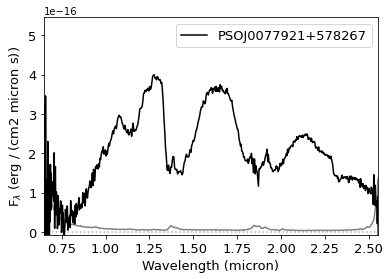

[<Figure size 432x288 with 1 Axes>]

<Figure size 432x288 with 0 Axes>

In [21]:
# read in a spectrum from an online fits file
f = download_file('http://pono.ucsd.edu/~adam/data/spex_test/spex_prism_PSOJ0077921+578267_120924.fits',cache="update")
sp = splat.Spectrum(file=f,file_type='fits',name='PSOJ0077921+578267')
sp.plot()

# Plotting spectra

There are several nice features contained in the splat.plot code and built into the .plot() routine that allows for publication-ready plots of spectra. Here's just a few examples


Retrieving 1 lucky file



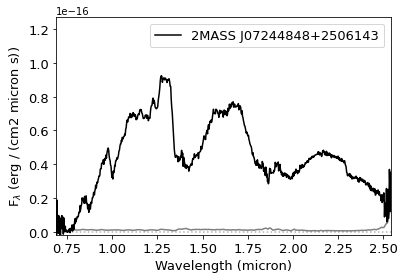

[<Figure size 432x288 with 1 Axes>]

<Figure size 432x288 with 0 Axes>

In [22]:
# get a nice high S/N L4 spectrum
sp = splat.getSpectrum(spt='L4',snr=50,lucky=True)[0]
sp.plot()

In [23]:
splot.plotSpectrum?

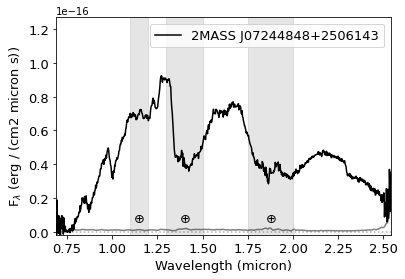

[<Figure size 432x288 with 1 Axes>]

<Figure size 432x288 with 0 Axes>

In [24]:
# there are some nice addons on the default plot routine
# this shows the regions of strong telluric absorption
sp.plot(telluric=True)

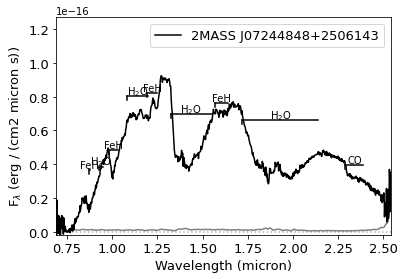

[<Figure size 432x288 with 1 Axes>]

<Figure size 432x288 with 0 Axes>

In [25]:
# this shows the locations of key spectral features
sp.plot(features=['feh','h2o','co'])

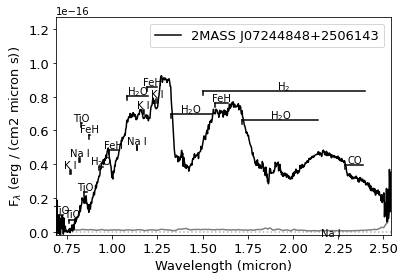

[<Figure size 432x288 with 1 Axes>]

<Figure size 432x288 with 0 Axes>

In [26]:
# or you can plot a pre-defined set of features
sp.plot(ldwarf=True)

In [27]:
# you can save you figure to .pdf or .png files
sp.plot(ldwarf=True,telluric=True,output='MyPlot.pdf')

[<Figure size 432x288 with 0 Axes>]

<Figure size 432x288 with 0 Axes>


Retrieving 20 files



[<Figure size 432x288 with 4 Axes>,
 <Figure size 432x288 with 4 Axes>,
 <Figure size 432x288 with 4 Axes>,
 <Figure size 432x288 with 4 Axes>,
 <Figure size 432x288 with 0 Axes>]

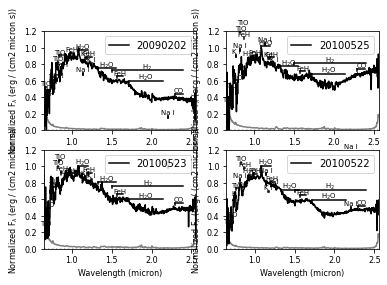

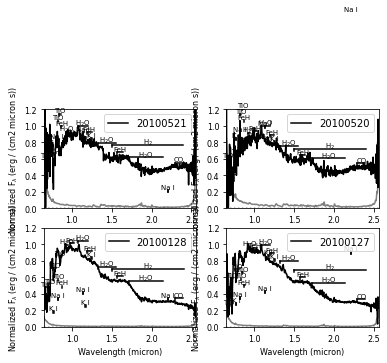

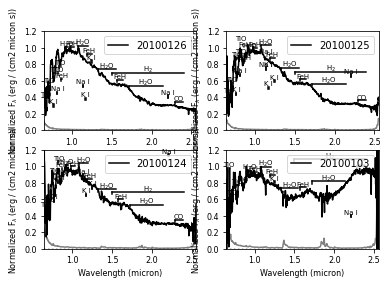

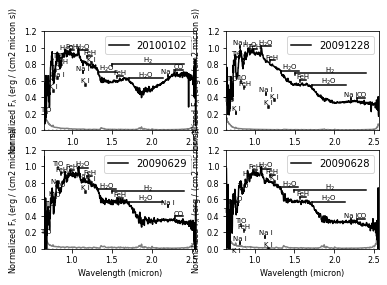

<Figure size 432x288 with 0 Axes>

In [28]:
# you can also plot a set of spectra using splat.plot.plotSpectrum commands
# this sequence reads in all of the TWA30B spectrum, normalizes them, and
# saves the file as a PDF file in your directory
splist = splat.getSpectrum(name = 'TWA 30B') # get all 20 spectra of TWA 30B
for sp in splist: sp.normalize([1.0,1.5])    # normalize the spectra
legend = [sp.observation_date for sp in splist]          # assigned legends to correspond to the observing dates
splot.plotSpectrum(splist,multiplot=True,layout=[2,2],multipage=True,legend=legend,yrange=[0,1.2],output='TWA30B.pdf')


# Spectrum manipulation

There are many built-in features for manipulating a spectrum object


Retrieving 1 lucky file



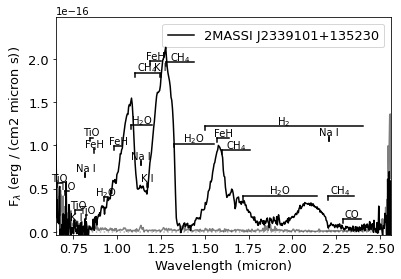

[<Figure size 432x288 with 1 Axes>]

<Figure size 432x288 with 0 Axes>

In [30]:
# grab a random T5 dwarf
sp = splat.getSpectrum(spt='T5', lucky=True)[0]
sp.plot(tdwarf=True)

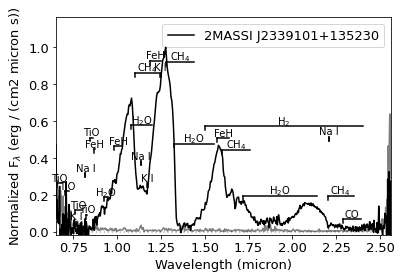

[<Figure size 432x288 with 1 Axes>]

<Figure size 432x288 with 0 Axes>

In [31]:
# normalize the spectrum to maximum value
sp.normalize()
sp.plot()

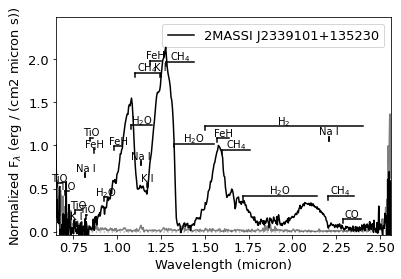

[<Figure size 432x288 with 1 Axes>]

<Figure size 432x288 with 0 Axes>

In [32]:
# normalize over a specific region
sp.normalize([1.5,1.7])
sp.plot()

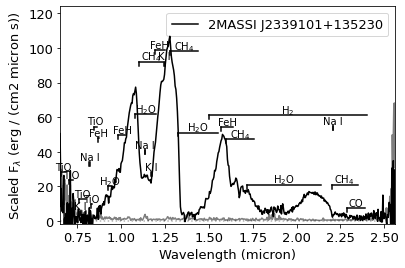

[<Figure size 432x288 with 1 Axes>]

<Figure size 432x288 with 0 Axes>

In [33]:
# multiple by a scale factor
sp.scale(50)
sp.plot()

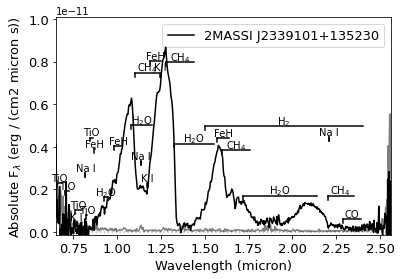

[<Figure size 432x288 with 1 Axes>]

<Figure size 432x288 with 0 Axes>

In [34]:
# flux calibrate the spectrum using a photometric magnitude
# form SpeX prism spectra these should be filters in the 1-2.5 micron range
# such as 2MASS JHKs, UKIDSS JHK, HST F110W/F160W, etc.
sp.fluxCalibrate('2MASS J',14.5,absolute=True)  # the "absolute" flag indicates this is an absolute magnitude
sp.plot()

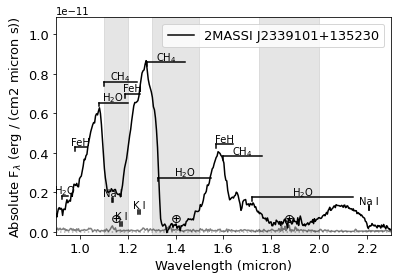

[<Figure size 432x288 with 1 Axes>]

<Figure size 432x288 with 0 Axes>

In [35]:
# trim the edges
sp.trim([0.9,2.3])
sp.plot(telluric=True)

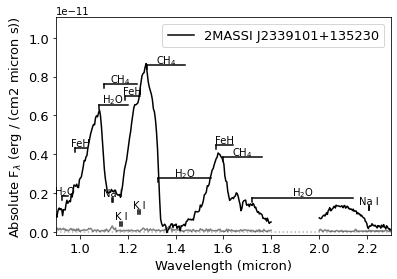

[<Figure size 432x288 with 1 Axes>]

<Figure size 432x288 with 0 Axes>

In [36]:
# mask part of the spectrum
sp.maskFlux([1.8,2.0])
sp.plot()

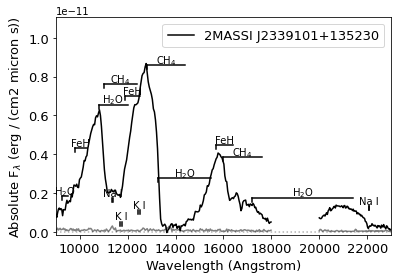

[<Figure size 432x288 with 1 Axes>]

<Figure size 432x288 with 0 Axes>

In [37]:
# change the wavelength units
sp.toWaveUnit(u.Angstrom)
sp.plot()

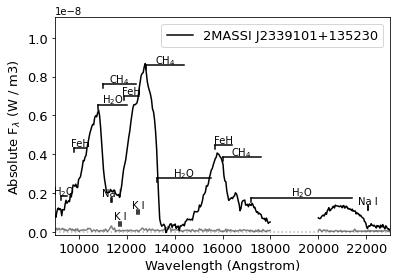

[<Figure size 432x288 with 1 Axes>]

<Figure size 432x288 with 0 Axes>

In [38]:
# change the flux units
sp.toFluxUnit(u.W/u.m/u.m/u.m)
sp.plot()

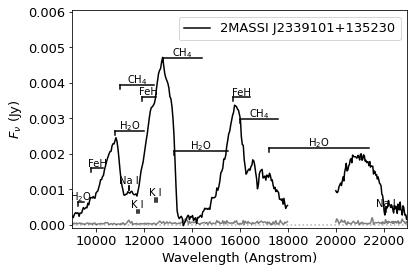

[<Figure size 432x288 with 1 Axes>]

<Figure size 432x288 with 0 Axes>

In [39]:
# change to fnu units (erg/cm2/s/Hz)
sp.toFnu()
sp.plot()

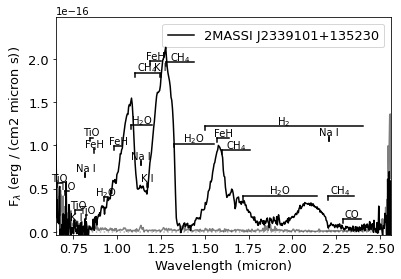

[<Figure size 432x288 with 1 Axes>]

<Figure size 432x288 with 0 Axes>

In [40]:
# reset all your changes to go back to the original spectrum
sp.reset()
sp.plot()

# Spectral Math

The Spectrum object takes care of all of the necessary math steps to add, subtract, multiply and divide spectra


Retrieving 1 lucky file


Retrieving 1 lucky file



Text(0, 0.5, 'Normalized Flux Density')

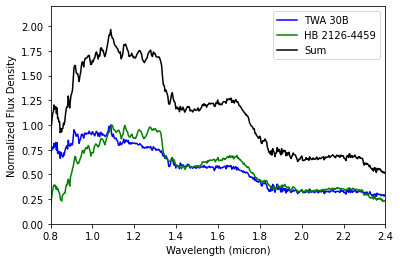

In [41]:
# read in two M-type spectra, normalize them and add them together
sp1 = splat.getSpectrum(spt=['M5','M9'],lucky=True)[0]
sp2 = splat.getSpectrum(spt=['M5','M9'],lucky=True)[0]
sp1.normalize()
sp2.normalize()

# add together
sp3 = sp1+sp2

# plot this up using matplotlib
plt.plot(sp1.wave,sp1.flux,'b-')
plt.plot(sp2.wave,sp2.flux,'g-')
plt.plot(sp3.wave,sp3.flux,'k-')
plt.legend([sp1.name,sp2.name,'Sum'])
plt.ylim([0,2.2])
plt.xlim([0.8,2.4])
plt.xlabel('Wavelength (micron)')
plt.ylabel('Normalized Flux Density')


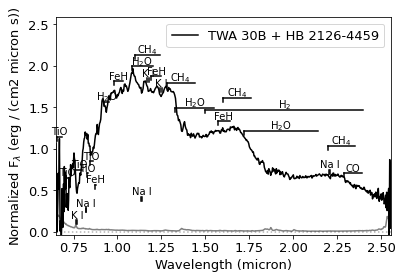

[<Figure size 432x288 with 1 Axes>]

<Figure size 432x288 with 0 Axes>

In [42]:
sp3.plot()


Retrieving 1 lucky file


Retrieving 1 lucky file



Text(0, 0.5, 'Difference')

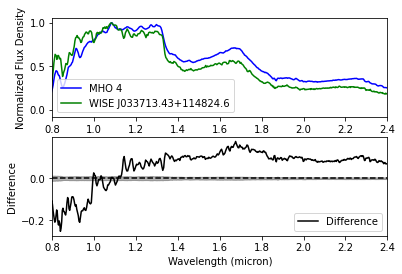

In [44]:
# read in two M7 spectra, normalize them and subtract them to see differences
sp1 = splat.getSpectrum(spt='M7',lucky=True)[0]
sp2 = splat.getSpectrum(spt='M7',lucky=True)[0]
sp1.normalize()
sp2.normalize()

# subtract
sp3 = sp1-sp2

# plot the individual spectra and their difference in two panels
plt.subplot(211)
plt.plot(sp1.wave,sp1.flux,'b-')
plt.plot(sp2.wave,sp2.flux,'g-')
#plt.ylim([0,1.2])
plt.xlim([0.8,2.4])
plt.ylabel('Normalized Flux Density')
plt.legend([sp1.name,sp2.name])

plt.subplot(212)
plt.plot(sp3.wave,sp3.flux,'k-')
plt.legend(['Difference'])
plt.plot([0.8,2.4],[0,0],'k--')
plt.fill_between(sp3.wave,sp3.noise,-1.*sp3.noise,color='k',alpha=0.3)
#plt.ylim([-0.5,0.5])
plt.xlim([0.8,2.4])
plt.xlabel('Wavelength (micron)')
plt.ylabel('Difference')



Retrieving 1 lucky file

[ 2.06036149 -1.56840602]


Text(0, 0.5, 'Ratio')

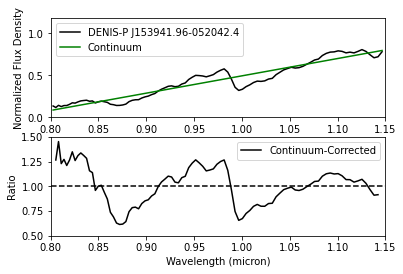

In [45]:
# fit part of a spectrum to a line and divide this out
fit_range = [0.8,1.15]

# read in an L dwarf spectrum and trim 
sp = splat.getSpectrum(spt='L4',snr=40,lucky=True)[0]
sp.trim(fit_range)

# fit to a line using np.polyfit
fit = np.polyfit(sp.wave.value,sp.flux.value,1)
print(fit)

# generate a spectrum that is this linear function
sp_continuum = splat.Spectrum(wave=sp.wave,flux=np.polyval(fit,sp.wave.value)*sp.flux.unit)

# divide out this continuum
sp_normalized = sp/sp_continuum

# plot the results
plt.subplot(211)
plt.plot(sp.wave,sp.flux,'k-')
plt.plot(sp_continuum.wave,sp_continuum.flux,'g-')
plt.ylim([0,np.nanquantile(sp.flux.value,0.98)*1.5])
plt.xlim(fit_range)
plt.ylabel('Normalized Flux Density')
plt.legend([sp.name,'Continuum'])

plt.subplot(212)
plt.plot(sp_normalized.wave,sp_normalized.flux,'k-')
plt.legend(['Continuum-Corrected'])
plt.plot(fit_range,[1,1],'k--')
plt.ylim([0.5,1.5])
plt.xlim(fit_range)
plt.xlabel('Wavelength (micron)')
plt.ylabel('Ratio')


We can also compare spectra to each other using the compareSpectra routine, which returns a comparison statistic (by default chi^2) and a scale factor


Retrieving 1 lucky file


Retrieving 1 lucky file



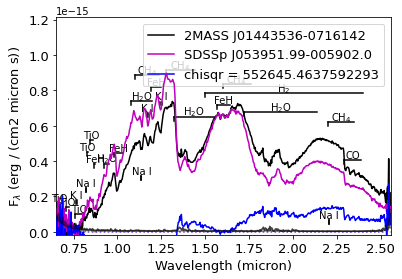

552645.4637592293 0.11102560205341815


<Figure size 432x288 with 0 Axes>

In [47]:
# read in two spectra of similar types
sp1 = splat.getSpectrum(spt='L5',lucky=True)[0]
sp2 = splat.getSpectrum(spt='L5',lucky=True)[0]
chi,scale = splat.compareSpectra(sp1,sp2,plot=True)
print(chi,scale)

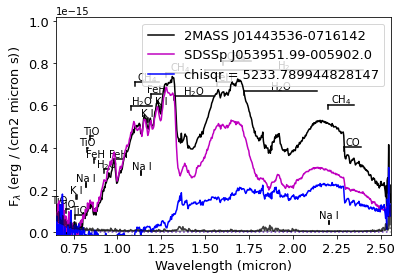

5233.789944828147 0.08488084638096767


<Figure size 432x288 with 0 Axes>

In [48]:
# we can also constrain the range over which the copmarison is made
chi,scale = splat.compareSpectra(sp1,sp2,fit_range=[1.0,1.25],plot=True)
print(chi,scale)

In [ ]:
# we can now overplot these by using the scale factor
sp2.scale(scale)
plt.plot(sp1.wave,sp1.flux,'k-')
plt.plot(sp2.wave,sp2.flux,'m-')
plt.ylim([0,np.quantile(sp1.flux.value,0.98)*1.5])
plt.xlabel('Wavelength ({})'.format(sp1.flux.unit))
plt.ylabel('Flux Density ({})'.format(sp1.flux.unit))


# Comparing spectra and spectral classification

We often want to compare spectra against each other, either to classify or to fit to models. The main function to do this is splat.compareSpectra, which returns the comparison statistic and optimal scale factor, and has many options for modifying and visualizing the comparison.

In [ ]:
# check out the options of compareSpectra
splat.compareSpectra?

In [ ]:
# read in M7 and M8 spectra and compare them
sp1 = splat.getSpectrum(spt='M7',lucky=True)[0]
sp2 = splat.getSpectrum(spt='M8',lucky=True)[0]

splat.compareSpectra(sp1,sp2,plot=True)


In [ ]:
# limit comparison to a specific range
splat.compareSpectra(sp1,sp2,fit_ranges=[0.8,1.0],plot=True)


In [ ]:
# to compare to spectral standards, you can use the built-in list of these standards
splat.initializeStandards()  # first read in the standards
stdM8 = splat.STDS_DWARF_SPEX['M8.0']  # there are different standard for different instruments
splat.compareSpectra(sp2,stdM8,plot=True)


A more efficient way to accomplish this is to use the built-in **splat.classifyByStandard()** function which will find the best match among pre-defined standards

In [49]:
# learn about the options for this routine
splat.classifyByStandard?


Retrieving 1 lucky file



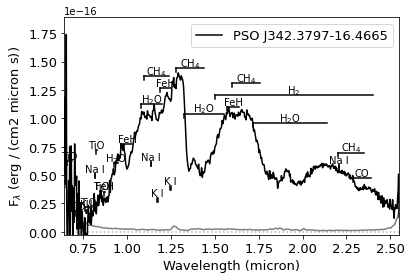

[<Figure size 432x288 with 1 Axes>]

<Figure size 432x288 with 0 Axes>

In [50]:
# read in a random L5 dwarf
sp = splat.getSpectrum(spt='L5',lucky=True)[0]
sp.plot()

Using dwarf standards
Type M0.0: statistic = 147276.49749486195, scale = 1.4887409187896143e-16
Type M1.0: statistic = 144238.42825403376, scale = 1.4364866139621497e-16
Type M2.0: statistic = 125393.6014648935, scale = 1.4170998027948316e-16
Type M3.0: statistic = 134436.23342692072, scale = 1.387852077489317e-16
Type M4.0: statistic = 100107.0876653369, scale = 1.2865670465805163e-16
Type M5.0: statistic = 91733.08702891039, scale = 1.275605892910812e-16
Type M6.0: statistic = 71379.59437278635, scale = 1.294669968666286e-16
Type M7.0: statistic = 62450.47193010656, scale = 1.366768925198092e-16
Type M8.0: statistic = 32534.377294779966, scale = 1.2800230144362637e-16
Type M9.0: statistic = 21014.58588941289, scale = 1.229204470214798e-16
Type L0.0: statistic = 12132.736563111606, scale = 1.2681042327953773e-16
Type L1.0: statistic = 7502.44633188483, scale = 1.2928282137394571e-16
Type L2.0: statistic = 12189.070994038735, scale = 1.2029143277665672e-16
Type L3.0: statistic = 11781.

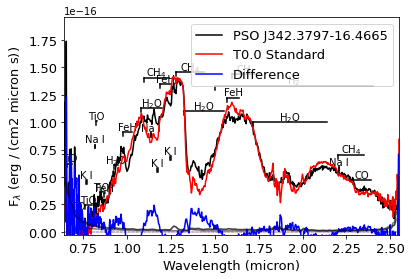

[<Quantity [0.7 , 2.45] micron>]


('T0.0', 0.5)

<Figure size 432x288 with 0 Axes>

In [51]:
# the easiest way to classify is to use classifyByStandard
# this will take some time on the first go as it reads in the standards
# the verbose command gives you additional feedback
splat.classifyByStandard(sp,plot=True,verbose=True)

In [52]:
# here's what the standards are
splat.STDS_DWARF_SPEX

{'M0.0': SPEX-PRISM spectrum of Gliese 270 (M0.0),
 'M1.0': SPEX-PRISM spectrum of Gl424 (M1.0),
 'M2.0': SPEX-PRISM spectrum of Gliese 91 (M2.0),
 'M3.0': SPEX-PRISM spectrum of Gl752A (M3.0),
 'M4.0': SPEX-PRISM spectrum of Gliese 213 (M4.0),
 'M5.0': SPEX-PRISM spectrum of Wolf 47 (M5.0),
 'M6.0': SPEX-PRISM spectrum of LHS 1375 (M6.0),
 'M7.0': SPEX-PRISM spectrum of VB 8 (M7.0),
 'M8.0': SPEX-PRISM spectrum of VB 10 (M8.0),
 'M9.0': SPEX-PRISM spectrum of LHS 2924 (M9.0),
 'L0.0': SPEX-PRISM spectrum of 2MASP J0345432+254023 (L0.0),
 'L1.0': SPEX-PRISM spectrum of 2MASSW J2130446-084520 (L1.0),
 'L2.0': SPEX-PRISM spectrum of Kelu-1 (L2.0),
 'L3.0': SPEX-PRISM spectrum of 2MASSW J1506544+132106 (L3.0),
 'L4.0': SPEX-PRISM spectrum of 2MASS J21580457-1550098 (L4.0),
 'L5.0': SPEX-PRISM spectrum of SDSS J083506.16+195304.4 (L5.0),
 'L6.0': SPEX-PRISM spectrum of 2MASSI J1010148-040649 (L6.0),
 'L7.0': SPEX-PRISM spectrum of 2MASSI J0103320+193536 (L7.0),
 'L8.0': SPEX-PRISM spectrum

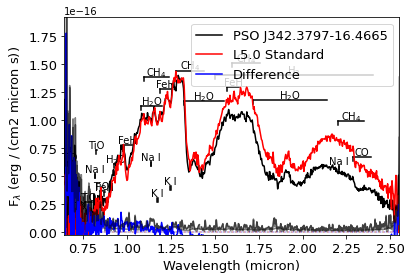

('L5.0', 0.5)

<Figure size 432x288 with 0 Axes>

In [53]:
# we can also vary how the classification is done
# this uses the method of Kirkpatrick et al. 2010, limiting the scaling to the 0.9-1.4 micron region
splat.classifyByStandard(sp,method='kirkpatrick',plot=True)

In [54]:
# there are other standard sets we can read in
splat.initializeStandards(sd=True)
splat.STDS_SD_SPEX

{'sdM2.0': SPEX-PRISM spectrum of LHS 3181 (sdM2.0),
 'sdM4.0': SPEX-PRISM spectrum of LSPM J0949+1746 (sdM4.0),
 'sdM5.0': SPEX-PRISM spectrum of LHS 407 (sdM5.0),
 'sdM5.5': SPEX-PRISM spectrum of APMPM 1523-0245 (sdM5.5),
 'sdM6.0': SPEX-PRISM spectrum of LHS 1074 (sdM6.0),
 'sdM7.0': SPEX-PRISM spectrum of LHS 377 (sdM7.0),
 'sdM8.0': SPEX-PRISM spectrum of 2MASS J01423153+0523285 (sdM8.0),
 'sdM9.5': SPEX-PRISM spectrum of SSSPM 1013-1356 (sdM9.5),
 'sdL0.0': SPEX-PRISM spectrum of WISE J04592121+1540592 (sdL0.0),
 'sdL3.5': SPEX-PRISM spectrum of SDSS J125637.16-022452.2 (sdL3.5),
 'sdL4.0': SPEX-PRISM spectrum of 2MASS J16262034+3925190 (sdL4.0)}


Retrieving 1 lucky file



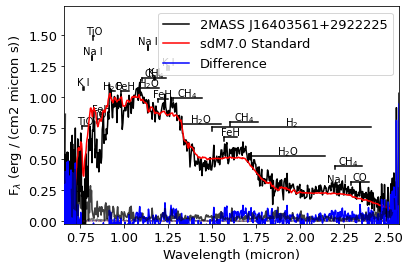

('sdM7.0', 0.5)

<Figure size 432x288 with 0 Axes>

In [57]:
# try classifying a subdwarf with these
#sp = splat.getSpectrum(spt='M7',subdwarf=True,lucky=True)[0]
#splat.classifyByStandard(sp,method='kirkpatrick',plot=True)
sp = splat.getSpectrum(spt='sdM7',subdwarf=True,lucky=True)[0]
splat.classifyByStandard(sp,sd=True,plot=True)


## Classify by indices

You can also use spectral indices to classify spectra; these indices sample specific features, such as molecular absorption bands

In [ ]:
# here's an example of measuring an existing set of indices
# it return a dictionary with the index names conneting to the measurement & uncertainty
sp = splat.getSpectrum(spt='L4',lucky=True)[0]
sp.plot(ldwarf=True)
splat.measureIndexSet(sp,set='burgasser')

In [ ]:
# you can find what index sets are available, and their definitions, using this command
spem.info_indices()

In [ ]:
# Let's classify using the allers2013 set
# this will return the mean type and uncertainty
splat.classifyByIndex(sp,ref='allers',verbose=True)

## Classify gravity

Allers & Liu (2013) have published a gravity classification scheme that allows us to distinguish low-gravity (young) obejcts from high-gravity (old) objects

In [ ]:
# grab a young spectrum
sp = splat.getSpectrum(spt=['M9','L2'],lowg=True,snr=40,lucky=True)[0]
sp.plot()

In [ ]:
splat.classifyByStandard(sp,method='kirkpatrick',plot=True)

In [ ]:
splat.classifyGravity(sp,verbose=True)

In [ ]:
splat.classifyByStandard(sp,lowg=True,plot=True)

# Index measurement

SPLAT has built-in functions to do index measurement, including literature-defined index sets and empirical relations to turn these into classifications

In [ ]:
# do a basic index measurement
# read in a random T5
sp = splat.getSpectrum(spt='T5',lucky=True)[0]

# measure the ratio of two regions - first range is numerator second range is denominator
ind = splat.measureIndex(sp,[[1.1,1.2],[1.22,1.32]],method='ratio',sample='integrate')
print(ind)

In [ ]:
# you can visualize the placement of these indices by setting plot=True
# NOTE: THIS IS CURRENTLY THROWING ERRORS SO DON'T RUN!

#ind = splat.measureIndex(sp,[[1.1,1.2],[1.22,1.32]],method='ratio',sample='integrate',plot=True)


In [ ]:
# measure an index set that is pre-defined in the literature
# this returns a dictionary of values
splat.measureIndexSet(sp,ref='burgasser',verbose=True)

In [ ]:
# there is a handy information function to find out what index sets are currently included
spem.info_indices()

In [ ]:
# you can use these indices to classify an object
splat.classifyByIndex(sp,ref='burgasser',verbose=True)

In [ ]:
# indices are also used for gravity classification of young sources
sp = splat.getSpectrum(spt='L2',young=True,lucky=True)[0]
splat.classifyGravity(sp,verbose=True)

In [ ]:
# you can compare to alternate standards as well
# this command compares to a suite of subdwarf standards
splat.classifyByStandard(sp2,plot=True,sd=True)

In [ ]:
# this command compares to a suite of low gravity standards
splat.classifyByStandard(sp2,plot=True,vlg=True)

# Exercise

Here's a real science case: we're going to analyze the spectrum of a known unresolved binary, 2MASS J0518-2828, by measuring its indices, comparing to spectral standards, and then comparing to a binary template constructed from two differently-classified sources (L5 and T5) that are scaled to their spectral type-based absolute J-band magnitudes. The outline of this exercise is in the next few cells; the solution is provided below

In [ ]:
# first read in the spectrum of 2MASS J0518-2828 by seaching on the shortname 'J0518-2828'
[enter code here]

In [ ]:
# measure the spectral indices from burgasser et al.
[enter code here]

In [ ]:
# determine the spectral type using the kirkpatrick method
[enter code here]

In [ ]:
# read in spectral templates for the primary and secondary types
[enter code here]

In [ ]:
# the absolute magnitudes of these types come from the function splat.empirical.typeToMag
mag_L5 = spem.typeToMag('L5','2MASS J',set='filippazzo')[0]
mag_T5 = spem.typeToMag('T5','2MASS J',set='filippazzo')[0]
print(mag_L5,mag_T5)

# now use the magnitudes to scale the template spectra
[enter here]

In [ ]:
# add the template spectra together to make a binary template
[enter code here]

In [ ]:
# now compare the binary template and J0518-2828 spectrum using compareSpectra, and plot the result
[enter code here]

In [ ]:
# BONUS: do the above steps a few times until you get a "best" fit, and plot the 
# appropriately scaled primary, secondary, binary templates and J0518-2828, and
# and the difference between J0518-2828 and the binary template to compare them
[enter code here]

# Exercise Solution

In [ ]:
# read in spectrum of known spectral binary
sp = splat.getSpectrum(shortname='J0518-2828')[0]
sp.normalize()
sp.plot()

In [ ]:
# indices
splat.measureIndexSet(sp,'burgasser',verbose=True)


In [ ]:
# classification
spt,spt_e = splat.classifyByStandard(sp,plot=True)
print('\nSpectral types: {}+/-{}'.format(spt,spt_e))


In [ ]:
# read in template spectra
sp1 = splat.getSpectrum(spt='L5',snr=20,binary=False,lucky=True)[0]
sp2 = splat.getSpectrum(spt='T5',snr=20,binary=False,lucky=True)[0]

# get the right magnitudes from an empirical relation of Filippazzo et al. (2015)
# this returns the value and uncertainty
mag_L5 = spem.typeToMag('L5','2MASS J',set='filippazzo')[0]
mag_T5 = spem.typeToMag('T5','2MASS J',set='filippazzo')[0]
print('\nL5 M_J = {}, T5 M_J = {}'.format(mag_L5,mag_T5))


In [ ]:
# scale the spectra
sp1.fluxCalibrate('2MASS J',mag_L5,absolute=True)
sp2.fluxCalibrate('2MASS J',mag_T5,absolute=True)

# add them to make a binary
sp3 = sp1+sp2
sp3.plot()

In [ ]:
# do an initial compareSpectra to get the scale factors
chi,scl_std = splat.compareSpectra(sp,splat.STDS_DWARF_SPEX[spt])
chi,scl_binary = splat.compareSpectra(sp,sp3)
sp3.scale(scl_binary)


In [ ]:
# read in spectrum of known spectral binary
sp = splat.getSpectrum(shortname='J0518-2828')[0]
sp.normalize()

# indices
splat.measureIndexSet(sp,'burgasser',verbose=True)

# classification
spt,spt_e = splat.classifyByStandard(sp)
print('\nSpectral types: {}+/-{}'.format(spt,spt_e))

# read in template spectra
sp1 = splat.getSpectrum(spt='L5',snr=20,binary=False,lucky=True)[0]
sp2 = splat.getSpectrum(spt='T5',snr=20,binary=False,lucky=True)[0]

# get the right magnitudes from an empirical relation of Filippazzo et al. (2015)
# this returns the value and uncertainty
mag_L5 = spem.typeToMag('L5','2MASS J',set='filippazzo')[0]
mag_T5 = spem.typeToMag('T5','2MASS J',set='filippazzo')[0]
print('\nL5 M_J = {}, T5 M_J = {}'.format(mag_L5,mag_T5))

# scale the spectra
sp1.fluxCalibrate('2MASS J',mag_L5,absolute=True)
sp2.fluxCalibrate('2MASS J',mag_T5,absolute=True)

# add them to make a binary
sp3 = sp1+sp2

# do an initial compareSpectra to get the scale factors
chi,scl_std = splat.compareSpectra(sp,splat.STDS_DWARF_SPEX[spt])
chi,scl_binary = splat.compareSpectra(sp,sp3)

# compute the difference
spdiff = sp-sp3

# visualize the results
plt.figure(figsize=[6,8])
plt.subplot(211)
plt.plot(sp.wave,sp.flux,'k-')
plt.plot(splat.STDS_DWARF_SPEX[spt].wave,splat.STDS_DWARF_SPEX[spt].flux*scl_std,'b-')
plt.legend(['J0518-2828',spt])
plt.ylim([0,np.nanquantile(sp.flux.value,0.98)*1.5])
plt.xlim([0.8,2.4])
plt.ylabel('Normalized Flux Density')

plt.subplot(212)
plt.plot(sp.wave,sp.flux,'k-')
plt.plot(sp1.wave,sp1.flux*scl_binary,'m-')
plt.plot(sp2.wave,sp2.flux*scl_binary,'b-')
plt.plot(sp3.wave,sp3.flux*scl_binary,'g-')
plt.legend(['J0518-2828','L5','T5','L5+T5'])
plt.ylim([0,np.nanquantile(sp.flux.value,0.98)*1.5])
plt.xlim([0.8,2.4])
plt.ylabel('Normalized Flux Density')
plt.xlabel('Wavelength')


